# 1: Portfolio Asset Allocation

This is about how you distribute your investment across different asset classes (stocks, bonds, commodities, crypto, etc.) to balance risk vs return

## Key concepts:

1. **Expected Return** → Average return of the portfolio.

2. **Risk (Volatility)** → Standard deviation of returns.

3. **Covariance / Correlation** → Measures how assets move together.

4. **Efficient Frontier** (Markowitz Portfolio Theory) → Optimal set of portfolios with the best return for a given risk.

5. **Sharpe Ratio** → Measures return per unit of risk.

## What are the types of assets ?

### 1. Equities (Stocks)

* What they are: Ownership shares in companies (e.g., Apple, Tesla, S&P500 index).

* Return source: Capital gains + dividends.

* Risk profile: Higher risk, higher return.

* Examples:

    * Domestic stocks (U.S. companies if you’re U.S.-based)

    * International / Emerging markets

    * Small-cap vs large-cap

### 2. Fixed Income (Bonds)

* What they are: Debt instruments; you lend money to a government or company.

* Return source: Interest (coupon payments).

* Risk profile: Lower return than stocks, but steadier. Prices move opposite to interest rates.

* Examples:

    * U.S. Treasury bonds (risk-free benchmark)

    * Corporate bonds

    * Municipal bonds

    * High-yield (junk) bonds

### 3. Cash & Cash Equivalents

* What they are: Most liquid, safest assets.

* Return source: Very small (savings rate, money market).

* Risk profile: Low risk, but loses value with inflation.

* Examples:

    * Cash in bank

    * Treasury bills

    * Money market funds

### 4. Commodities

* What they are: Physical goods with global markets.

* Return source: Price changes. Often a hedge against inflation.

* Risk profile: Volatile, cyclical.

* Examples:

    * Gold, silver, platinum

    * Oil, natural gas

    * Agricultural (wheat, corn, coffee)

### 5. Real Assets (Real Estate & Infrastructure)

* What they are: Physical property or infrastructure.

* Return source: Rent, lease income, property value appreciation.

* Risk profile: Moderate. Sensitive to interest rates.

* Examples:

    * Real Estate Investment Trusts (REITs)

    * Direct property investments

    * Infrastructure funds (roads, energy pipelines)

### 6. Alternative Investments

* What they are: Assets outside traditional stocks/bonds.

* Return source: Depends on strategy. Often uncorrelated with markets.

* Risk profile: Can be high risk, sometimes illiquid.

* Examples:

    * Hedge funds

    * Venture capital, private equity

    * Art, collectibles

    * Cryptocurrencies (Bitcoin, Ethereum, etc.)

### 7. Derivatives (Not an asset class by itself, but important)

* What they are: Contracts whose value comes from underlying assets.

* Use: Hedging risk or speculation.

* Examples:

    * Options (calls/puts)

    * Futures (commodity futures, stock index futures)

    * Swaps

## **In practice, a balanced portfolio might hold:**

50% equities (U.S. + international)

30% bonds (treasuries, corporates)

10% real estate (REITs)

5% commodities (gold, oil)

5% alternatives (crypto, hedge funds, etc.)

#2: IMPORT DATASETS AND LIBRARIES

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px             # for interactive, dynamic plots
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# AAPL = Apple Stock
# BA = Boeing
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stocks_df = pd.read_csv('/content/drive/MyDrive/stock.csv')
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [4]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

#3: PERFORM EXPLORATORY DATA ANALYSIS AND BASIC VISUALIZATION

In [11]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [12]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [13]:
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

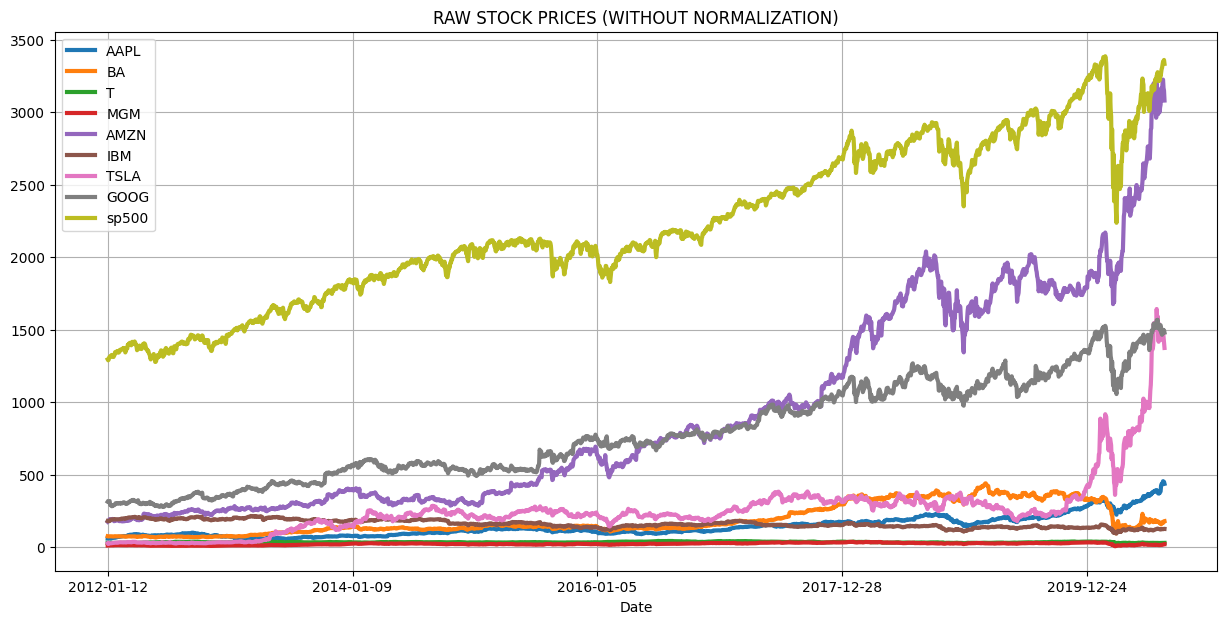

In [14]:
# Plot the data
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

Plot the normalized data:

* To visualize real dollar trends (raw data).
* Then to compare performance fairly across stocks (normalized data).

In [15]:
def normalize(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

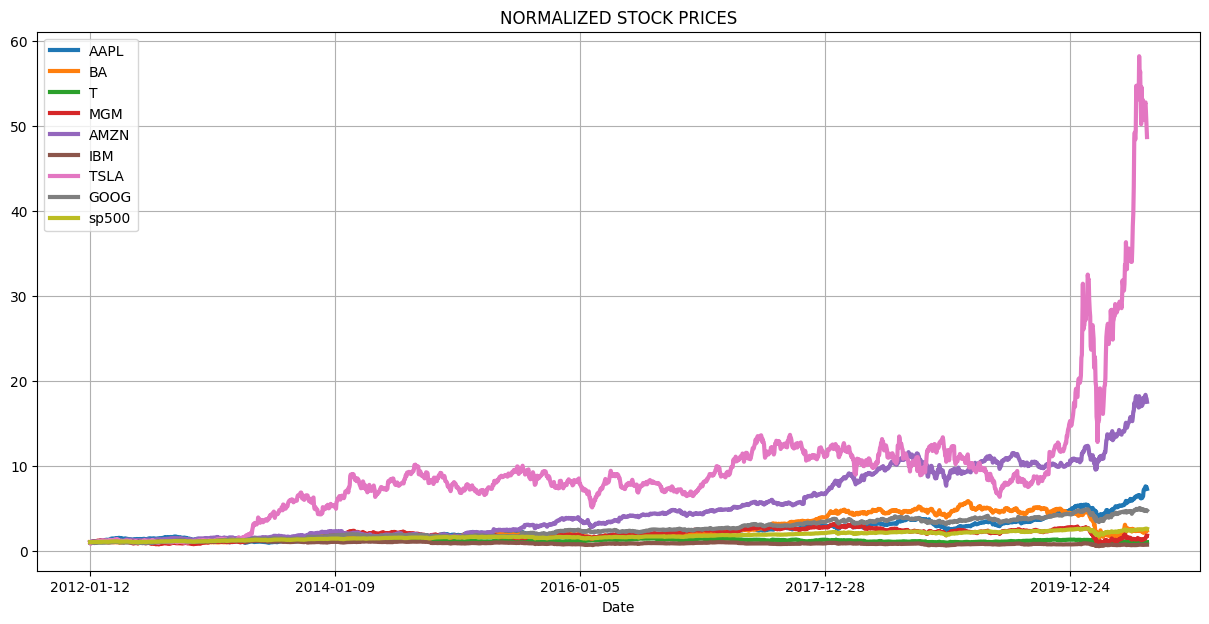

In [16]:
# Plot the normalized data
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [17]:
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [18]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [19]:
# Plot interactive chart
interactive_plot(normalize(stocks_df), 'Prices')

#4: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

 **What is the common advice that financial advisors generally give to retired seniors when it comes to asset allocations?**


*  The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks
* For Example: If you're 30 years old, you should have 70% allocated to stocks
* If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio).

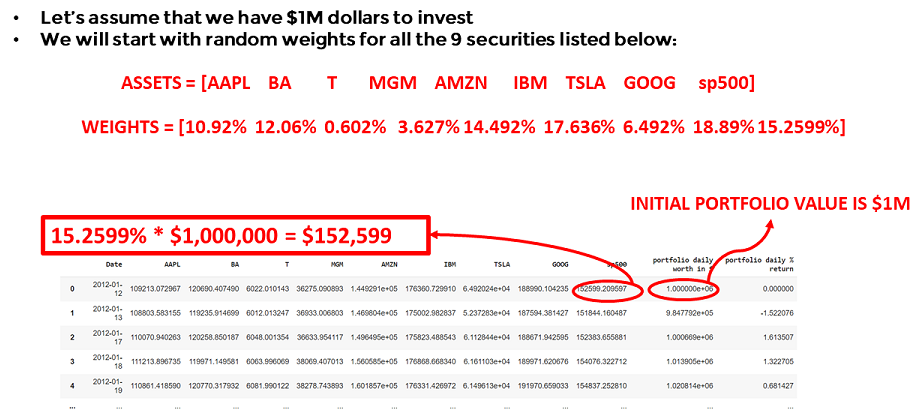

In [41]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1

# Set random seed
# np.random.seed(101)
np.random.seed()

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))

# Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights)
print(weights)


[0.10507396 0.11410897 0.19784536 0.01034996 0.08966635 0.00114512
 0.14478059 0.13810104 0.19892866]


In [40]:
# Normalize the stock avalues
df_portfolio = normalize(stocks_df)
df_portfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [22]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

Date           AAPL             BA              T            MGM  \
0     2012-01-12   30065.397042  142480.781930  106236.546490   85088.036122   
1     2012-01-13   29952.668103  140763.683823  106060.187480   86631.265137   
2     2012-01-17   30301.560352  141971.307952  106695.067218   85929.797403   
3     2012-01-18   30616.206202  141631.663666  106977.235991   89296.842526   
4     2012-01-19   30519.172073  142575.120017  107294.675861   89787.869940   
...          ...            ...            ...            ...            ...   
2154  2020-08-05  219877.167307  328851.143882  105284.223354  117285.398094   
2155  2020-08-06  227548.513114  324926.361687  105248.952258  129490.936664   
2156  2020-08-07  221974.808968  320812.905204  105883.831997  133489.316776   
2157  2020-08-10  225201.168404  338531.015479  106518.715263  151867.764390   
2158  2020-08-11  218503.715382  339889.594512  106518.715263  150815.562789   

              AMZN           IBM          TSLA           GOOG          sp500  
0     1.719666e+05  91261.807054  9.468109e+04  191079.863083   87139.902335  
1     1.744005e+05  90559.210441  7.638167e+04  189668.707064   86708.740825  
2     1.775675e+05  90983.799484  8.915105e+04  190758.183370   87016.813036  
3     1.851722e+05  91524.651163  8.985487e+04  192072.232646   87983.389617  
4     1.900694e+05  91246.643593  8.968729e+04  194093.375378   88417.909393  
...            ...           ...           ...            ...            ...  
2154  3.132826e+06  63410.652068  4.977109e+06  897759.414879  223837.556570  
2155  3.152346e+06  63749.317021  4.992391e+06  913897.768353  225276.316199  
2156  3.096102e+06  63162.974958  4.868820e+06  910480.027024  225418.922751  
2157  3.077237e+06  64249.726907  4.754398e+06  911460.870058  226037.070685  
2158  3.011267e+06  64067.758803  4.606327e+06  901847.288009  224235.751350  

[2159 rows x 10 columns]

In [46]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio.drop('Date', axis=1).sum(axis = 1)
df_portfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  portfolio daily % return  \
0      1.000000  1.000000  1.000000                       0.0   
1      0.806726  0.992615  0.995052                       0.0   
2      0.941593  0.998317  0.998587                       0.0   
3      0.949027  1.005193  1.009680                       0.0   
4      0.947257  1.015771  1.014666                       0.0   
...         ...       ...       ...                       ...   
2154  52.567080  4.698347  2.568715                       0.0   
2155  52.728494  4.782805  2.585226                       0.0   
2156  51.423361  4.764919  2.586862                       0.0   
2157  50.214865  4.770052  2.593956                       0.0   
2158  48.650974  4.719740  2.573284                       0.0   

      portfolio daily worth in $  
0                       9.000000  
1                       8.801523  
2                       8.986509  
3                       9.112369  
4                       9.163747  
...                          ...  
2154                   90.737379  
2155                   91.487707  
2156                   89.671549  
2157                   88.831120  
2158                   86.585039  

[2159 rows x 12 columns]

In [47]:
# Let's calculate the portfolio daily return
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

df_portfolio

/tmp/ipython-input-1563811662.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipython-input-1563811662.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignm

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  portfolio daily % return  \
0      1.000000  1.000000  1.000000                  0.000000   
1      0.806726  0.992615  0.995052                 -2.205298   
2      0.941593  0.998317  0.998587                  2.101743   
3      0.949027  1.005193  1.009680                  1.400547   
4      0.947257  1.015771  1.014666                  0.563828   
...         ...       ...       ...                       ...   
2154  52.567080  4.698347  2.568715                  0.544140   
2155  52.728494  4.782805  2.585226                  0.826923   
2156  51.423361  4.764919  2.586862                 -1.985139   
2157  50.214865  4.770052  2.593956                 -0.937230   
2158  48.650974  4.719740  2.573284                 -2.528484   

      portfolio daily worth in $  
0                       9.000000  
1                       8.801523  
2                       8.986509  
3                       9.112369  
4                       9.163747  
...                          ...  
2154                   90.737379  
2155                   91.487707  
2156                   89.671549  
2157                   88.831120  
2158                   86.585039  

[2159 rows x 12 columns]

In [37]:
def portfolio_allocation(df, weights):

  df_portfolio = df.copy()

  # Normalize the stock avalues
  df_portfolio = normalize(df_portfolio)

  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio.drop('Date', axis=1).sum(axis = 1)

  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):

    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [48]:
# Call the function
df_portfolio = portfolio_allocation(stocks_df, weights)
df_portfolio

/tmp/ipython-input-244089156.py:19: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipython-input-244089156.py:19: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignm

Date           AAPL             BA              T           MGM  \
0     2012-01-12  105073.959150  114108.972316  197845.355035  10349.956620   
1     2012-01-13  104679.988770  112733.795273  197516.919933  10537.672239   
2     2012-01-17  105899.313759  113700.948502  198699.262653  10452.346958   
3     2012-01-18  106998.952826  113428.936657  199224.748306  10861.908308   
4     2012-01-19  106659.833404  114184.525117  199815.919666  10921.636005   
...          ...            ...            ...            ...           ...   
2154  2020-08-05  768437.032900  263367.912255  196071.834387  14266.386178   
2155  2020-08-06  795247.211886  260224.661237  196006.148680  15751.046073   
2156  2020-08-07  775767.969321  256930.306128  197188.491400  16237.401882   
2157  2020-08-10  787043.601542  271120.257415  198370.840688  18472.923399   
2158  2020-08-11  763637.028719  272208.306309  198370.840688  18344.935477   

              AMZN          IBM          TSLA           GOOG          sp500  \
0     8.966635e+04  1145.117163  1.447806e+05  138101.043086  198928.657213   
1     9.093543e+04  1136.301257  1.167982e+05  137081.144312  197944.373573   
2     9.258677e+04  1141.628833  1.363244e+05  137868.552319  198647.660926   
3     9.655201e+04  1148.415227  1.374006e+05  138818.268175  200854.225040   
4     9.910545e+04  1144.926897  1.371444e+05  140279.028692  201846.175150   
...            ...          ...           ...            ...            ...   
2154  1.633510e+06   795.651854  7.610693e+06  648846.558893  510990.985406   
2155  1.643688e+06   799.901288  7.634062e+06  660510.391033  514275.479804   
2156  1.614361e+06   792.544099  7.445105e+06  658040.252972  514601.031351   
2157  1.604525e+06   806.180234  7.270138e+06  658749.147378  516012.179804   
2158  1.570127e+06   803.896970  7.043717e+06  651801.027951  511900.010443   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.693639e+05                 -3.063615  
2                   9.953209e+05                  2.677737  
3                   1.005288e+06                  1.001407  
4                   1.011102e+06                  0.578321  
...                          ...                       ...  
2154                1.164698e+07                  0.399127  
2155                1.172057e+07                  0.631805  
2156                1.147902e+07                 -2.060832  
2157                1.132524e+07                 -1.339716  
2158                1.103091e+07                 -2.598867  

[2159 rows x 12 columns]

In [49]:
df_portfolio.columns

Index(['Date', 'AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG',
       'sp500', 'portfolio daily worth in $', 'portfolio daily % return'],
      dtype='object')

In [50]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

#7: UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

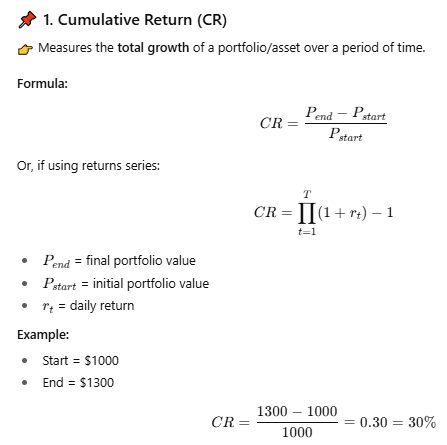

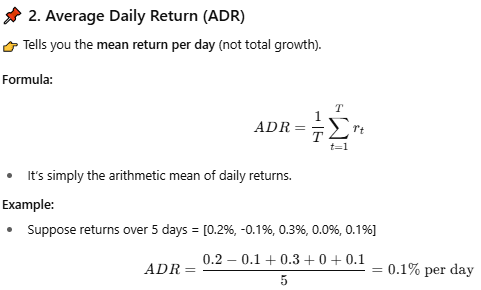

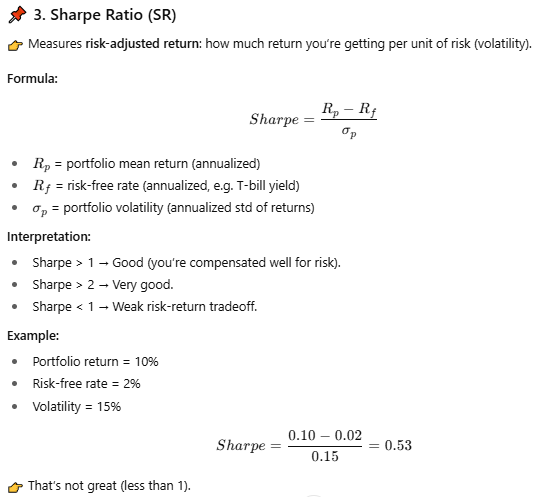

In [51]:
df_portfolio

Date           AAPL             BA              T           MGM  \
0     2012-01-12  105073.959150  114108.972316  197845.355035  10349.956620   
1     2012-01-13  104679.988770  112733.795273  197516.919933  10537.672239   
2     2012-01-17  105899.313759  113700.948502  198699.262653  10452.346958   
3     2012-01-18  106998.952826  113428.936657  199224.748306  10861.908308   
4     2012-01-19  106659.833404  114184.525117  199815.919666  10921.636005   
...          ...            ...            ...            ...           ...   
2154  2020-08-05  768437.032900  263367.912255  196071.834387  14266.386178   
2155  2020-08-06  795247.211886  260224.661237  196006.148680  15751.046073   
2156  2020-08-07  775767.969321  256930.306128  197188.491400  16237.401882   
2157  2020-08-10  787043.601542  271120.257415  198370.840688  18472.923399   
2158  2020-08-11  763637.028719  272208.306309  198370.840688  18344.935477   

              AMZN          IBM          TSLA           GOOG          sp500  \
0     8.966635e+04  1145.117163  1.447806e+05  138101.043086  198928.657213   
1     9.093543e+04  1136.301257  1.167982e+05  137081.144312  197944.373573   
2     9.258677e+04  1141.628833  1.363244e+05  137868.552319  198647.660926   
3     9.655201e+04  1148.415227  1.374006e+05  138818.268175  200854.225040   
4     9.910545e+04  1144.926897  1.371444e+05  140279.028692  201846.175150   
...            ...          ...           ...            ...            ...   
2154  1.633510e+06   795.651854  7.610693e+06  648846.558893  510990.985406   
2155  1.643688e+06   799.901288  7.634062e+06  660510.391033  514275.479804   
2156  1.614361e+06   792.544099  7.445105e+06  658040.252972  514601.031351   
2157  1.604525e+06   806.180234  7.270138e+06  658749.147378  516012.179804   
2158  1.570127e+06   803.896970  7.043717e+06  651801.027951  511900.010443   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.693639e+05                 -3.063615  
2                   9.953209e+05                  2.677737  
3                   1.005288e+06                  1.001407  
4                   1.011102e+06                  0.578321  
...                          ...                       ...  
2154                1.164698e+07                  0.399127  
2155                1.172057e+07                  0.631805  
2156                1.147902e+07                 -2.060832  
2157                1.132524e+07                 -1.339716  
2158                1.103091e+07                 -2.598867  

[2159 rows x 12 columns]

In [52]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 1003.090967652914 %


In [53]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.7505156650712785


In [54]:
# Calculate the average daily return
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.12660715881231496 %


In [55]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.1481338776966807


# Home Work
**Try at least 3 different random weights allocation, rerun the code and compare sharpe ratios, daily return and cummulative returns.**